# Analysis of WC C1s KLL coincidences

### load settings and data (path, filenames, flags, binsize)


 finished loading.


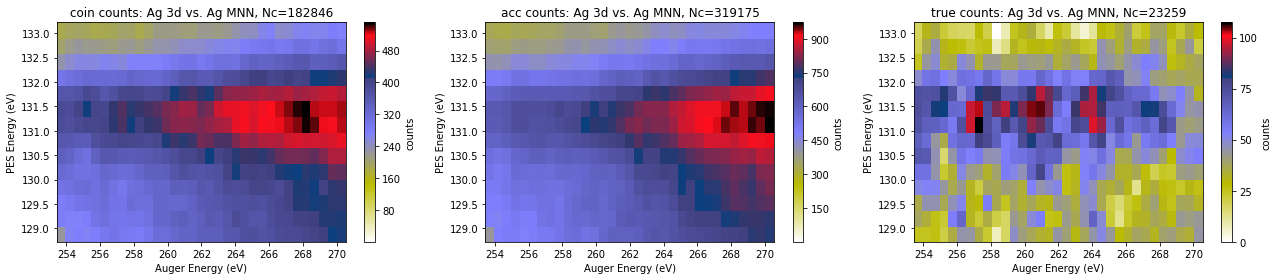

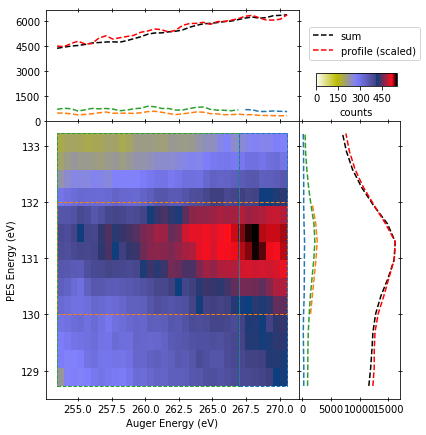

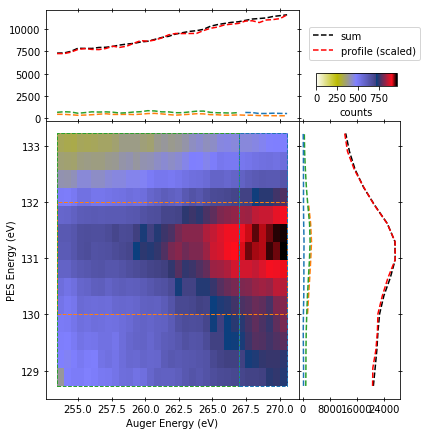

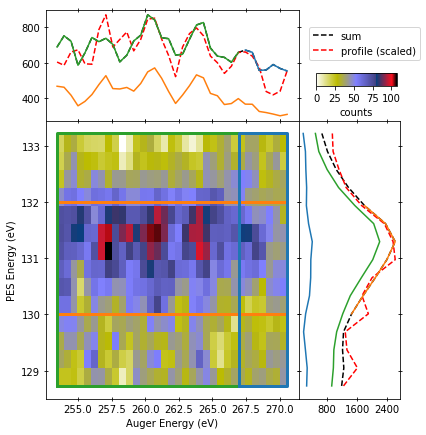

In [3]:
import sys, os
# own libs from pycoin folder one level above
pycoinpath='../'
sys.path.append(pycoinpath) # add libcoin path here (if not installed as module)
#
ScriptFolder = 'Ag3dMNN_coincidences_scripts/'

basepath        = '/media/raid/shared/Data/Coin/2020/KW04_WC'

picprefix   ='WC_C1sKLL_007'
datafilename=picprefix+'_analysed_weekend.h5'

dxy          = [.5,.3]       # bin resolution in A1,A2 coord.
EkinFermi_xy = [0,0] # kinetic Energy of Fermi for calibration

flag_savefig=True
flag_save2dplot=True

### load settings and data
# -*- coding: utf-8 -*-
"""
@author: (c) torsten.leitner@gmail.com
"""    




### ### ### ### ### ### ### ### ### ### ### ### ### ###
### python libraries
### ### ### ### ### ### ### ### ### ### ### ### ### ###
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tables

# own libs from pycoin folder one level above
#from libcoin.h5analyze_get_maps_from_multiple_h5files import h5analyze_get_maps_from_multiple_h5files
from libcoin.plot.plot_pcolor_map import plot_pcolor_map
#from libcoin.plot.plot_allinone_collage import plot_allinone_collage
from libcoin.plot.plot_all3maps_frames_in_true_only import plot_all3maps_frames_in_true_only

from libcoin.ASCcfg import ASCcfg_from_h5
# from libcoin.dfmap_from_table import dfmap_from_table
from libcoin.dfmaps_from_pytables_search import dfmaps_from_pytables_search

### ### ### ### ### ### ### ### ### ### ### ### ### ###



### ### ### ### ### ### ### ### ### ### ### ### ### ###
### dataset descritption
### ### ### ### ### ### ### ### ### ### ### ### ### ###


#'''
picpath=basepath+'/pics'


h5name=os.path.join(basepath,datafilename)
# h5key for dataset
ASCcfg = ASCcfg_from_h5(h5name, h5path='/')

# histogram
#pictxt='_binnned'
histgram_method='weighted' 

# Axis params
par={}  
# A1: Auger specs
par['a1']={ 
      'name'      : 'Ag MNN'
     ,'type'      : 'Auger'
     ,'axis'      : 0
     ,'erange'    : ASCcfg['a1']['Erange']#[330,359]
     ,'EkinFermi' : EkinFermi_xy[0]
     ,'de'        : dxy[0]
     }
# A2: PES specs
par['a2']={ 
      'name'      : 'Ag 3d'
     ,'type'      : 'PES'
     ,'axis'      : 1
     ,'erange'    : ASCcfg['a2']['Erange']#[365,379]
     ,'EkinFermi' : EkinFermi_xy[1]
     ,'de'        : dxy[1]
     }
#par['prefix'] = prefix
par['picpath']= picpath
par['Ephot']  = 420

### ### ### ### ### ### ### ### ### ### ### ### ### ###



### ### ### ### ### ### ### ### ### ### ### ### ### ###
### plot parameter
### ### ### ### ### ### ### ### ### ### ### ### ### ###

fignum=0
nbinsSumDiff=31
ncontourlevels=25
cmap=plt.cm.get_cmap('terrain_r', ncontourlevels)

### ### ### ### ### ### ### ### ### ### ### ### ### ###







### ### ### ### ### ### ### ### ### ### ### ### ### ###
### Load Data with explicit database request
### ### ### ### ### ### ### ### ### ### ### ### ### ###
# unfortunately, one has to use kinetic energies here.

# histogram par
dsetkey='etp'
xvar='E1'
xrange=ASCcfg['a1']['Erange']
yvar='E2'
yrange=ASCcfg['a2']['Erange']

dfcoin,dfacc,dftrue = dfmaps_from_pytables_search( h5name, xrange, yrange, dxy, xvar='E1', yvar='E2', dsetkey=dsetkey)
# default: condition='( theta1 < 22*(3.1415/180) )'&'( theta2 < 22*(3.1415/180) )'

print('\n finished loading.')
### ### ### ### ### ### ### ### ### ### ### ### ### ###






### ### ### ### ### ### ### ### ### ### ### ### ### ###
### Calibrate and name datasets
### ### ### ### ### ### ### ### ### ### ### ### ### ###
dftrue.name='true'; dfacc.name='acc'; dfcoin.name='coin'; 
# Claibrate Energy axis with EkinFermi(a1;a2) and Ephot(mono)
for df in [dftrue,dfacc,dfcoin]:
    # Auger
    df.index  = df.index  # + (par['Ephot']-par['a1']['EkinFermi'])  # Auger
    # PES
    df.columns= df.columns #- (par['a2']['EkinFermi']) # PES  
### ### ### ### ### ### ### ### ### ### ### ### ### ###







#'''
#


# Ag3dMNN_defineROIframes.py

df=dftrue

# define Regions-of-Interest (ROIs) as frames in the map
ROIs=[]
a1maxrange=[df.index.min(),df.index.max()]
a2maxrange=[df.columns.min(),df.columns.max()]

ROIs.append( {'a1range':a1maxrange,  'a2range':[130.,132],   'txt':'blub'       ,'linecolor':'tab:orange','marker':'x'    } )

ROIs.append( {'a1range':[a1maxrange[0],267],'a2range':a2maxrange, 'txt':'left'        ,'linecolor':'tab:green'   } )
#ROIs.append( {'a1range':[260,264],'a2range':a2maxrange, 'txt':'middle'        ,'linecolor':'tab:red'   } )
ROIs.append( {'a1range':[267,a1maxrange[1]],'a2range':a2maxrange, 'txt':'right'        ,'linecolor':'tab:blue'   } )
#ROIs.append( {'a1range':a1maxrange,  'a2range':[130.3,132],   'txt':'blub'       ,'linecolor':'tab:orange','marker':'x'    } )

#ROIs.append( {'a1range':a1maxrange,  'a2range':[131.3,132], 'txt':'left'        ,'linecolor':'tab:green'   } )
#ROIs.append( {'a1range':a1maxrange,  'a2range':[130.3,131.], 'txt':'middle'        ,'linecolor':'tab:red'   } )






# calc stuff for each ROIs
for roi in ROIs:
    tmpdf=df.loc[(roi['a1range'][0]<=df.index)  &(df.index  <=roi['a1range'][1])
                ,(roi['a2range'][0]<=df.columns)&(df.columns<=roi['a2range'][1])]
    roi['a1']=(tmpdf.sum(axis=1))
    roi['a2']=(tmpdf.sum(axis=0))
### ### ### ### ### ###

# Singles from Acc counts
singles  = { 'a1':(dfacc.sum(axis=1))
            ,'a2':(dfacc.sum(axis=0)) }
# All True Coins
fulltrue = { 'a1':(dftrue.sum(axis=1) )
            ,'a2':(dftrue.sum(axis=0) )   }

cmap='gist_stern_r'

# -*- coding: utf-8 -*-
"""
@author: (c) torsten.leitner@gmail.com
"""    



#  Figure 4: measured, accidental, true coincidences maps
### ### ### ### ### ### ### ### ### ### ### ### ### ###
### # all 3 maps as horizontal subplot, Frames only in true map
### ### ### ### ### ### ### ### ### ### ### ### ### ###
plot_all3maps_frames_in_true_only(dfcoin,dfacc,dftrue
                    ,par ,cmap=cmap,fignum=77
                    ,flag_savefig=flag_save2dplot
                    ,picprefix=os.path.join(picpath,picprefix)
                    ,picpostfix=''
                    ,notitle=False
                    ,print_dxy=False
                    ,invertXaxis=False
                    ,invertYaxis=False
                    #,framecoords=ROIs,framelinestyle='--',framelinewidth=3
                    ,figsize=(18, 4)
                    )



# Figure X:  single maps, NO spectra
### ### ### ### ### ### ### ### ### ### ### ### ### ###
### plot 2d overview (single) maps with frames idicating the ROIs
### ### ### ### ### ### ### ### ### ### ### ### ### ###
if 0:
    # plot raw coin map
    if 1: 
        df=dfcoin ; figum=1 ; 
        ax1,fig1 = plot_pcolor_map(df,par,fignum=fignum,cmap=cmap
            ,flag_savefig=flag_save2dplot  ### saveing the figure makes it slow!!!
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
            ,framecoords=None,framelinestyle='--',framelinewidth=2 )
    # plot acc coin map
    if 1: 
        df=dfacc ; figum=2 ; 
        ax2,fig2 = plot_pcolor_map(df,par,fignum=fignum,cmap=cmap
            ,flag_savefig=flag_save2dplot  ### saveing the figure makes it slow!!!
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
            ,framecoords=None,framelinestyle='--',framelinewidth=2 )
    # plot true coin map
    if 1: 
        df=dftrue ; figum=3 ; 
        ax3,fig3 = plot_pcolor_map(df,par,fignum=fignum,cmap=cmap
            ,flag_savefig=flag_save2dplot  ### saveing the figure makes it slow!!!
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
            ,framecoords=ROIs,framelinestyle='--',framelinewidth=2 )

        
        
# Figure X:  single maps, WITH spectra
### ### ### ### ### ### ### ### ### ### ### ### ### ###
### plot 2d overview (single) maps with frames idicating the ROIs
### ### ### ### ### ### ### ### ### ### ### ### ### ###
if 0:
    from libcoin.plot.plot_map_with_spectra import * #plot_map_with_specs

    # plot coin map with specs
    if 1:
        df=dfcoin
        ax7,fig7 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='--',framelinewidth=1
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            ) 
    # plot acc map with specs
    if 0:
        df=dfacc
        ax8,fig8 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='--',framelinewidth=1
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            ) 
        # plot true map with specs
    if 1:
        df=dftrue
        ax9,fig9 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='--',framelinewidth=1
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            ) 
        
        
if 1:
    from libcoin.plot.plot_map_with_spectra import * #plot_map_with_specs

    # plot coin map with specs
    if 1:
        df=dfcoin
        ax7,fig7 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='--',framelinewidth=1
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            ) 
        
        
    # plot acc map with specs
    if 1:
        df=dfacc
        ax8,fig8 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='--',framelinewidth=1
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            ) 
        # plot true map with specs
    if 1:
        df=dftrue
        ax9,fig9 = plot_map_with_spectra(df,par,cmap=cmap
            ,picpostfix='',picprefix=os.path.join(picpath,picprefix)
     #       , Ncolorticks=5, Nticks_topspec=3, Nticks_sidespec=4
            #, plot_maxtraces_in_map=True
            , framecoords=ROIs, framelinestyle='-',framelinewidth=3
            , plot_framesums=True
            , figsize=(6,6)
            , flag_savefig=flag_savefig
            , space_between_plots=0
            , linplt_sz = 0.4   , notitle=True
            , verPlotArea=[0.08,0.98] # (bottom,top)
            , horPlotArea=[0.12,0.94] # (left,right)
            )         
        
        
        
    